# DBSCAN Clustering
    -- density-based spatial clustering of applications with noise (DBSCAN)
    -- is a density-based algorithm that groups together points that are closely packed (high-density areas) and identifies points in low-density areas as noise or outliers.
    -- it does not require the number of clusters to be specified upfront

## Imports

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

random_s = 101

## Load Data

In [64]:
df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/Mall_Customers.csv')
df.head(3)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


## Select Features to Cluster

In [65]:
# Use Annual Income & Spending Score

reduced_df = df.drop(df.loc[:,:'Age'], axis = 1)
reduced_df.tail(3)

,Annual Income (k$),Spending Score (1-100)
197,126,74
198,137,18
199,137,83


## Normalized Values

In [66]:
# Standard Scaler is preferred for distance based metrics and density estimations
# It also deals better with variance and is less impacted by outliers

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
reduced_df_scaled = scaler.fit_transform(reduced_df)
reduced_df_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

## Reconstruct the array to DataFrame

In [67]:
reduced_df_scaled = pd.DataFrame(reduced_df_scaled, columns = reduced_df.columns)
reduced_df_scaled.head(3)

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


## Visualize the Data

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

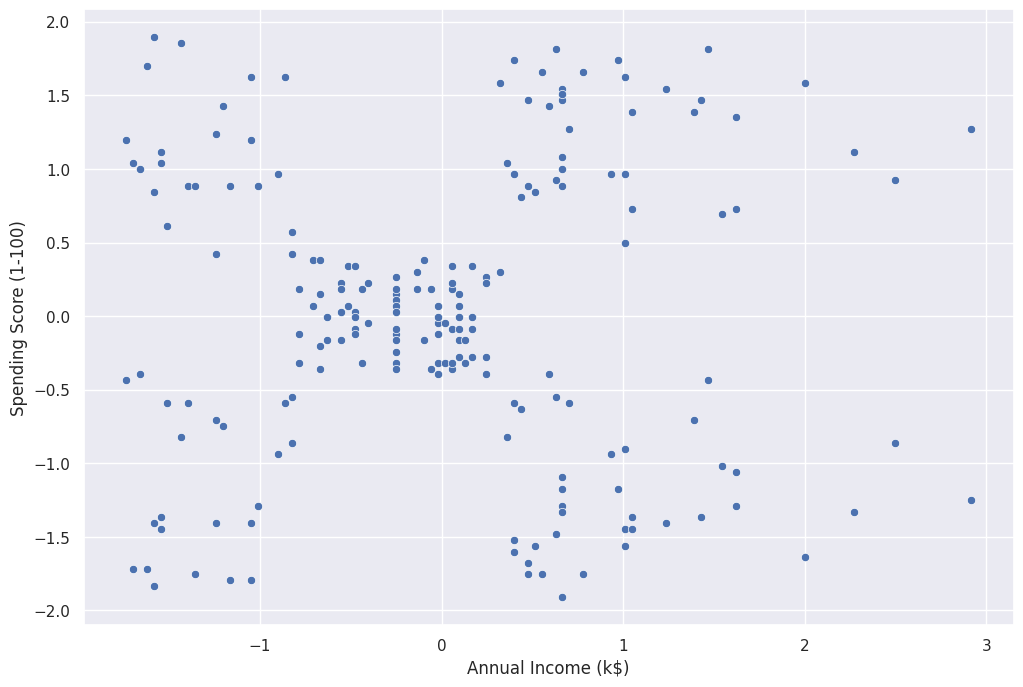

In [68]:
sns.set(rc = {'figure.figsize': (12, 8)}) # Global Graph Size

sns.scatterplot(x = reduced_df_scaled['Annual Income (k$)'], y = reduced_df_scaled['Spending Score (1-100)'])

## Understanding the DBSCAN Parameters
    
      -- eps (epsilon): defines the maximum distance between two points for one to be considered as part of the neighborhood of the other
      -- min_samples: minimum number of points required to form a dense regions (core point).
      -- If a pont has a fewer than min_samples within eps, it is labeled as noise or an edge point

In [69]:
# NOTE:
# One of the best way to select the optimal eps is to use a k-distance graph, which helps to visualize
# the ideal eps value

# FOR eps:
# 1. Compute the distances between each point and its k-th nearest neighbor (typically k = min_samples)
# 2. Sort these distances and plot them. The point where the plot shows an "elbow", a significant
#    bend, is usually a good candidate fro eps.

# FOR min_samples:
# 1. A common rule of thumb for min_samples is to set it to be at least min_samples = 2 * dimensions.
# 2. Increase min_samples if you want fewer but larger clusters and decrease it if you expect many
#    smaller clusters.

# Silhouette Score (S-Score):
# After choosing eps and min_samples, you can evaluate the quality of your clustering using the S-Score,
# which measures how similar each point is to its own cluster compared to other clusters.
# This score ranges from -1 (bad blustering) to +1 (good clustering)

## K-Distance Graph

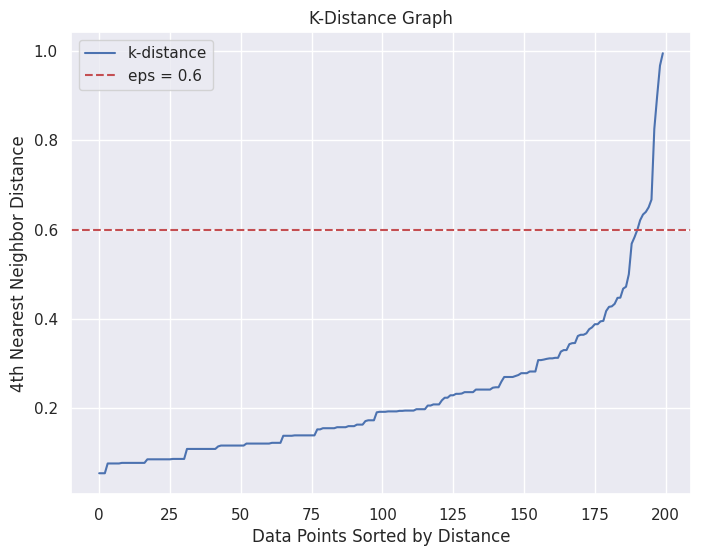

In [70]:
from sklearn.neighbors import NearestNeighbors

# Compute the K-Nearest Neighbors distances for k = min_samples
# min_samples = 4 (From 2 dimensions or two variables multiplied by 2)

min_samples = 4

neighbors = NearestNeighbors(n_neighbors = min_samples)
neighbors_fit = neighbors.fit(reduced_df_scaled)

distances, indices = neighbors_fit.kneighbors(reduced_df_scaled)

# Sort the distances (use the k-th nearest neighbor distance for each point)

k_distances = np.sort(distances[:,-1])

# Plot the k-distance graph

plt.figure(figsize = (8,6), facecolor = 'white')
plt.plot(k_distances, label = 'k-distance')
plt.title('K-Distance Graph')
plt.xlabel('Data Points Sorted by Distance')
plt.ylabel(f'{min_samples}th Nearest Neighbor Distance')
plt.grid(True)
plt.axhline(y = 0.6, color = 'r', linestyle = '--', label = 'eps = 0.6')
plt.legend()
plt.show()

In [71]:
# Looking at the values

# Remember the number of nearest neighbor is set to 4, n_neighbors = min_samples = 4
# A matrix where each row contains the distances from a given data point to its k nearest neighbors

distances[:3,:]

array([[0.        , 0.08564307, 0.27669913, 0.37699224],
       [0.        , 0.15990848, 0.20603662, 0.20857963],
       [0.        , 0.07633886, 0.16332841, 0.31170347]])

## Silhouette Scores (sklearn)

In [72]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

# Define range of potential eps values based on the k-distance plot

eps_values = np.linspace(0.2, 1.1, 10)

# Store S-Scores

s_scores = []

# Evaluate DBScan for each eps_values and calculate S-Score

for eps in eps_values:

  dbscan = DBSCAN(eps = eps, min_samples = min_samples)  # DBSCAN
  labels = dbscan.fit_predict(reduced_df_scaled)

  # Check if the clustering has more than 1 cluster to calculate S-Score
  if len(set(labels)) > 1:

    score = silhouette_score(reduced_df_scaled, labels)

  else:

    score = -1  # Invalid clustering scenario

  s_scores.append(score)

In [73]:
# Look at s_scores
s_scores

[0.19685111632552818,
 0.38427960728258165,
 0.39828449401818633,
 0.35044619989666004,
 0.42136463110237615,
 -1,
 -1,
 -1,
 -1,
 -1]

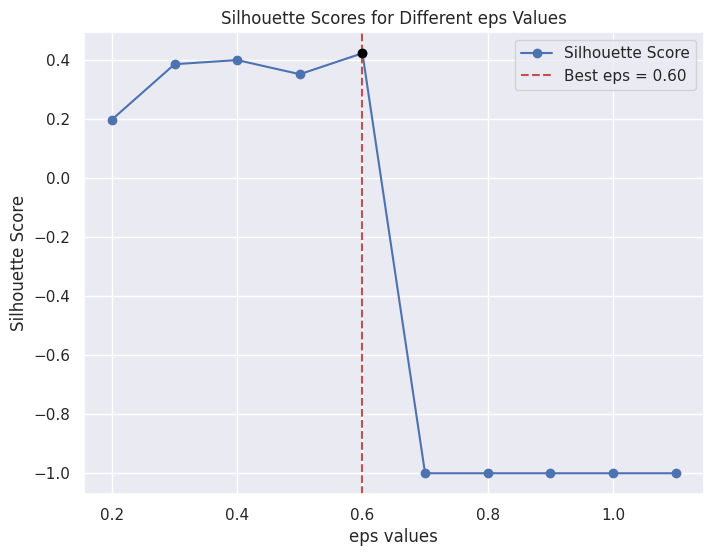

In [74]:
# Plot the S-Scores

# Plot the Silhouette Scores for different eps values

plt.figure(figsize=(8, 6))

# Plot silhouette scores for each eps value

plt.plot(eps_values, s_scores, marker='o', label='Silhouette Score')

# Add labels and title
plt.title('Silhouette Scores for Different eps Values')
plt.xlabel('eps values')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Highlight the best eps

best_eps_index = np.argmax(s_scores) # find the index of the best s_score
best_eps = eps_values[best_eps_index] # this will be 0.6
best_s_score = s_scores[best_eps_index] # this will be 0.421

plt.axvline(x = best_eps, color='r', linestyle='--', label = f'Best eps = {best_eps:.2f}')
plt.scatter(best_eps, best_s_score, color='black', zorder = 5)
plt.legend()
plt.show()

In [75]:
# Install yellowbrik
# !pip install yellowbrick
# NOTE: So far the yellobrick library support only KMeans clustering (n_clusters)

## Final DBSCAN Model

In [76]:
# Define DBSCAN model with eps = n and min_samples = n

final_model = DBSCAN(eps = 0.25, min_samples =  4)

# Fit the model to the scaled dataset

clusters = final_model.fit_predict(reduced_df_scaled)

# Add the cluster labels to the scaled DataFrame

reduced_df_scaled['Cluster'] = clusters
reduced_df_scaled.head(3)

,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.738999,-0.434801,-1
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,1


## Visualized the Clusters

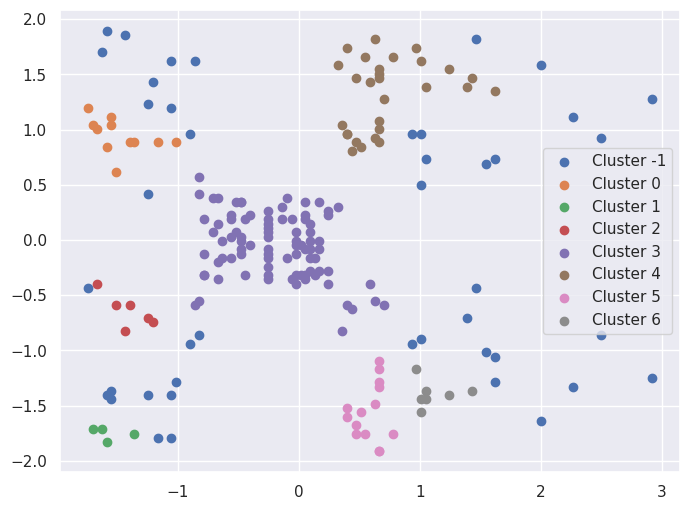

In [77]:
# Plotting the clusters

plt.figure(figsize=(8,6))

# Scatter plot for the DBSCAN clusters

# Get the unique clusters

unique_clusters = reduced_df_scaled['Cluster'].unique()

# Scatter plot for each cluster with labels

for cluster in unique_clusters:

    cluster_data = reduced_df_scaled[reduced_df_scaled['Cluster'] == cluster]

    plt.scatter(cluster_data['Annual Income (k$)'],
                cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster}', marker='o')


# Display the legend
plt.legend()

# Show the plot
plt.show()

In [78]:
len(reduced_df_scaled[reduced_df_scaled['Cluster'] == -1])

43

In [79]:
# NOTE:
# These are bad clusters for customer segmentation